# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

In [283]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html


<a id='intro'></a>
## Introduction


In [284]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.
df = pd.read_csv('tmdb-movies.csv')
df.drop_duplicates()
df.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

### General Properties
  #### Database description:
  The database contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. I show the first 5 rows in the database to illustrate an overview of it. I deside to find out some interesting phenomenon which are related to different genres, directors and production companies.
  #### Questions I want to find out:
1. Which director can gain the most profit per film?
2. What kind of film have the biggest budget based on genre?
3. Which production company is the most profitable?

# Data Sturcture
Before I do the analysis, I found that there exists some null elements in some columns. So I need to deside which column needs cleaning and how I clean it. Moreover, some columns have multiple values such as genres and production companies. These values need to be separated so that we can analyze them more efficiently.

In [285]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [286]:
# After discussing the structure of the data and any problems that need to be
#   cleaned, perform those cleaning steps in the second part of this section.
df['release_date'] = pd.to_datetime(df['release_date'])
df = df.drop(['cast','imdb_id','tagline','homepage','release_date','vote_count','overview','runtime','keywords'], axis=1)
df

,id,popularity,budget,revenue,original_title,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6.5,2015,1.379999e+08,1.392446e+09
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,7.1,2015,1.379999e+08,3.481613e+08
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,6.3,2015,1.012000e+08,2.716190e+08
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,7.5,2015,1.839999e+08,1.902723e+09
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,7.3,2015,1.747999e+08,1.385749e+09
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western|Drama|Adventure|Thriller,Regency Enterprises|Appian Way|CatchPlay|Anony...,7.2,2015,1.241999e+08,4.903142e+08
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,Science Fiction|Action|Thriller|Adventure,Paramount Pictures|Skydance Productions,5.8,2015,1.425999e+08,4.053551e+08
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,Drama|Adventure|Science Fiction,Twentieth Century Fox Film Corporation|Scott F...,7.6,2015,9.935996e+07,5.477497e+08
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,Family|Animation|Adventure|Comedy,Universal Pictures|Illumination Entertainment,6.5,2015,6.807997e+07,1.064192e+09
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,Comedy|Animation|Family,Walt Disney Pictures|Pixar Animation Studios|W...,8.0,2015,1.609999e+08,7.854116e+08


### Data Cleaning
I fill the null values in director, production_companies and genres columns with unknown and create a new column
called profit which value is profit of every film.

In [287]:
# Replace the null values with 'unknown' in director, genres and production_companies.
df['director'] = df['director'].fillna('unknown')
df['genres'] = df['genres'].fillna('unknown')
df['production_companies'] = df['production_companies'].fillna('unknown')
df['profit'] = df['revenue'] - df['budget']

Check the dataframe if there's any null entries.

In [288]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 13 columns):
id                      10866 non-null int64
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
director                10866 non-null object
genres                  10866 non-null object
production_companies    10866 non-null object
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              10866 non-null float64
revenue_adj             10866 non-null float64
profit                  10866 non-null int64
dtypes: float64(4), int64(5), object(4)
memory usage: 1.1+ MB


# Data cleaning conclusion
From what I did above, we finally get the dataframe including the data we need, and replace the null elements with the value we can use in the next session. 

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1 : Are there any relationship between a film's budget and its rating?
To solve this question, I create 2 new dataframes. One stores the 100 most expensive movies from database, the other stores the 100 cheapest movies from database.

In [289]:
df_1 = df.copy()
df_expensive = df_1.sort_values(by=['budget_adj'],ascending=False).head(100)
df_expensive_budget = df_expensive.groupby(['original_title'])['vote_average'].mean()
df_cheap = df_1.sort_values(by=['budget_adj'],ascending=True).head(100)
df_cheap_budget = df_cheap.groupby(['original_title'])['vote_average'].mean()

I plot the histogram of 2 dataframes respectively in one figure.

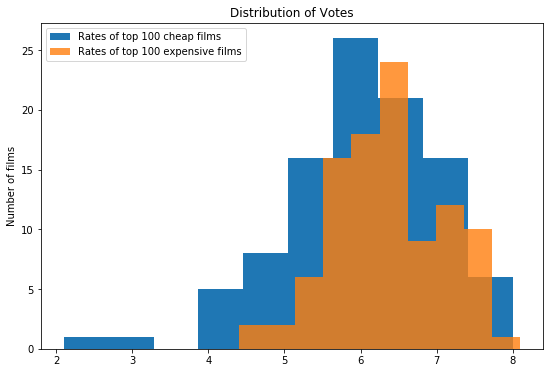

In [290]:
plt.figure(figsize=(9,6))
plt.hist(df_cheap_budget,label='Rates of top 100 cheap films')
plt.hist(df_expensive_budget, alpha=0.8, label='Rates of top 100 expensive films')
plt.ylabel('Number of films')
plt.title('Distribution of Votes')
plt.legend(loc='upper left')
plt.show()

From the plot above, I find that high cost movies tend to have a more stable quality because the lowest rating of high cost movies is nearly 4.5 while that of low cost movies is nearly 2.1. However, we cannot conclude that lower cost film cannot get high ratings.

### Research Question 2 : Among Adventure, Action and Science Fiction films, which one makes the highest profit on average since 1990s? How many films are produced repectively in this period?

I created three new dataframe which contains movies that have Adventure, Action or Science Fiction respectively. Then for each dataframe, I pick all the data which release year is after 1990.

In [291]:
df_2 = df.copy()
# filter the data
df_adv = df_2[df_2['genres'].str.contains("Adventure")]
df_adv = df_adv[df_adv['release_year'] >= 1990]

df_scifi = df_2[df_2['genres'].str.contains("Science Fiction")]
df_scifi = df_scifi[df_scifi['release_year'] >= 1990]

df_act = df_2[df_2['genres'].str.contains("Action")]
df_act = df_act[df_act['release_year'] >= 1990]
#check the results by comparing the calculations.

print(df_adv.genres.str.contains(r'Adventure').sum() == df_adv['id'].count())
print(df_scifi.genres.str.contains(r'Science Fiction').sum() == df_scifi['id'].count())
print(df_act.genres.str.contains(r'Action').sum() == df_act['id'].count())


True
True
True


I add a 'release_decade' column for each rows.

In [292]:
# decades = [1960, 1970, 1980, 1990, 2000, 2010, 2020]
decades = [1990, 2000, 2010, 2020]
# decade_name = ['1960', '1970', '1980', '1990', '2000', '2010', '2020']
decade_name = ['1990', '2000', '2010']
df_adv['release_decade'] = pd.cut(df_adv['release_year'],decades, labels = decade_name)
df_scifi['release_decade'] = pd.cut(df_scifi['release_year'],decades, labels = decade_name)
df_act['release_decade'] = pd.cut(df_act['release_year'],decades, labels = decade_name)

I calculated the mean budget in decades for each data frame.

In [293]:
df_1990_adv = df_adv.query('release_decade == "1990"')
df_1990_adv_mean = df_1990_adv['budget'].mean()
df_2000_adv = df_adv.query('release_decade == "2000"')
df_2000_adv_mean = df_2000_adv['budget'].mean()
df_2010_adv = df_adv.query('release_decade == "2010"')
df_2010_adv_mean = df_2010_adv['budget'].mean()

df_1990_scifi = df_scifi.query('release_decade == "1990"')
df_1990_scifi_mean = df_1990_scifi['budget'].mean()
df_2000_scifi = df_scifi.query('release_decade == "2000"')
df_2000_scifi_mean = df_2000_scifi['budget'].mean()
df_2010_scifi = df_scifi.query('release_decade == "2010"')
df_2010_scifi_mean = df_2010_scifi['budget'].mean()

df_1990_act = df_act.query('release_decade == "1990"')
df_1990_act_mean = df_1990_act['budget'].mean()
df_2000_act = df_act.query('release_decade == "2000"')
df_2000_act_mean = df_2000_act['budget'].mean()
df_2010_act = df_act.query('release_decade == "2010"')
df_2010_act_mean = df_2010_act['budget'].mean()



Text(0.5,1,'Film budget from 1990s to 2010s')

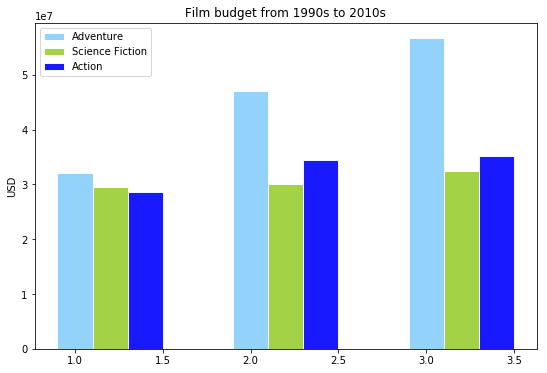

In [294]:
plt.figure(figsize=(9,6))
X = np.arange(3) + 1
Y_adv = [df_1990_adv_mean, df_2000_adv_mean, df_2010_adv_mean]
Y_sci = [df_1990_scifi_mean, df_2000_scifi_mean, df_2010_scifi_mean]
Y_act = [df_1990_act_mean, df_2000_act_mean, df_2010_act_mean]
plt.bar(X, Y_adv, alpha=0.9, width=0.2, facecolor='lightskyblue', edgecolor = 'white', label='Adventure', lw=1)
plt.bar(X+0.2, Y_sci, alpha=0.9, width=0.2, facecolor='yellowgreen', edgecolor = 'white', label='Science Fiction', lw=1)
plt.bar(X+0.4, Y_act, alpha=0.9, width=0.2, facecolor='blue', edgecolor = 'white', label='Action', lw=1)
plt.legend(loc="upper left")
plt.ylabel('USD')
plt.title('Film budget from 1990s to 2010s')

From the plot above, we can conclude that Adventure films are the most profitable among three genres over last 3 decades, Action ranks second while Science Fiction ranks third.

In [295]:
df_1990_adv = df_adv.query('release_decade == "1990"')
df_1990_adv_count = df_1990_adv['budget'].count()
df_2000_adv = df_adv.query('release_decade == "2000"')
df_2000_adv_count = df_2000_adv['budget'].count()
df_2010_adv = df_adv.query('release_decade == "2010"')
df_2010_adv_count = df_2010_adv['budget'].count()

df_1990_scifi = df_scifi.query('release_decade == "1990"')
df_1990_scifi_count = df_1990_scifi['budget'].count()
df_2000_scifi = df_scifi.query('release_decade == "2000"')
df_2000_scifi_count = df_2000_scifi['budget'].count()
df_2010_scifi = df_scifi.query('release_decade == "2010"')
df_2010_scifi_count = df_2010_scifi['budget'].count()

df_1990_act = df_act.query('release_decade == "1990"')
df_1990_act_count = df_1990_act['budget'].count()
df_2000_act = df_act.query('release_decade == "2000"')
df_2000_act_count = df_2000_act['budget'].count()
df_2010_act = df_act.query('release_decade == "2010"')
df_2010_act_count = df_2010_act['budget'].count()

Text(0.5,1,'Film amount from 1990s to 2010s')

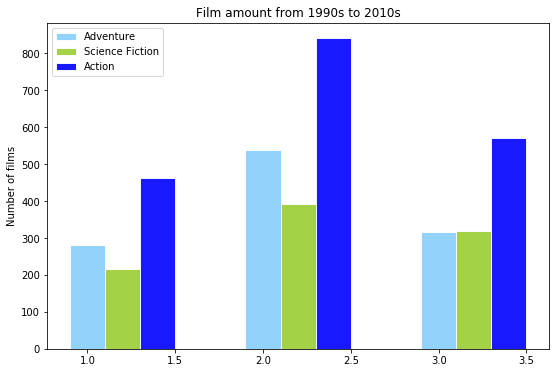

In [296]:
plt.figure(figsize=(9,6))
X = np.arange(3) + 1
Y_adv_count = [df_1990_adv_count, df_2000_adv_count, df_2010_adv_count]
Y_sci_count = [df_1990_scifi_count, df_2000_scifi_count, df_2010_scifi_count]
Y_act_count = [df_1990_act_count, df_2000_act_count, df_2010_act_count]
plt.bar(X, Y_adv_count, alpha=0.9, width=0.2, facecolor='lightskyblue', edgecolor = 'white', label='Adventure', lw=1)
plt.bar(X+0.2, Y_sci_count, alpha=0.9, width=0.2, facecolor='yellowgreen', edgecolor = 'white', label='Science Fiction', lw=1)
plt.bar(X+0.4, Y_act_count, alpha=0.9, width=0.2, facecolor='blue', edgecolor = 'white', label='Action', lw=1)
plt.legend(loc="upper left")
plt.ylabel('Number of films')
plt.title('Film amount from 1990s to 2010s')

According to this chart, the number of films featured with 3 genres all growed rapidly from 1990s to 2000s. But there's a considerable drop in 2010s. In my opnion, this is because there's still two and a half years remaining in this decade, and during this period, there will be more films shown in the cinema.

## Research Question 3: What kind of film do Universal Studios,  Twentieth Century Fox Film Corporation, Columbia Pictures tend to make more profit respectively?

To solve this problem, I will first simplify the dataframe by deleting the rest produce companies in the produce_companies except the first one appeared in the column.

In [297]:
df_3 = df.copy()

df_3['production_companies'] = df_3['production_companies'].apply(lambda x: x.split('|')[0])
df_3['genres'] = df_3['genres'].apply(lambda x: x.split('|')[0])
df_3['production_companies'].head(15)
df_3

,id,popularity,budget,revenue,original_title,director,genres,production_companies,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,32.985763,150000000,1513528810,Jurassic World,Colin Trevorrow,Action,Universal Studios,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,28.419936,150000000,378436354,Mad Max: Fury Road,George Miller,Action,Village Roadshow Pictures,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,13.112507,110000000,295238201,Insurgent,Robert Schwentke,Adventure,Summit Entertainment,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,11.173104,200000000,2068178225,Star Wars: The Force Awakens,J.J. Abrams,Action,Lucasfilm,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,9.335014,190000000,1506249360,Furious 7,James Wan,Action,Universal Pictures,7.3,2015,1.747999e+08,1.385749e+09,1316249360
5,281957,9.110700,135000000,532950503,The Revenant,Alejandro GonzÃ¡lez IÃ±Ã¡rritu,Western,Regency Enterprises,7.2,2015,1.241999e+08,4.903142e+08,397950503
6,87101,8.654359,155000000,440603537,Terminator Genisys,Alan Taylor,Science Fiction,Paramount Pictures,5.8,2015,1.425999e+08,4.053551e+08,285603537
7,286217,7.667400,108000000,595380321,The Martian,Ridley Scott,Drama,Twentieth Century Fox Film Corporation,7.6,2015,9.935996e+07,5.477497e+08,487380321
8,211672,7.404165,74000000,1156730962,Minions,Kyle Balda|Pierre Coffin,Family,Universal Pictures,6.5,2015,6.807997e+07,1.064192e+09,1082730962
9,150540,6.326804,175000000,853708609,Inside Out,Pete Docter,Comedy,Walt Disney Pictures,8.0,2015,1.609999e+08,7.854116e+08,678708609


Then I extract the data into three dataframes.

In [298]:
df_us = df_3.query('production_companies == "Universal Studios"')
df_21fox = df_3.query('production_companies == "Twentieth Century Fox Film Corporation"')
df_cp = df_3.query('production_companies == "Columbia Pictures"')

Plot the results in to pie charts.

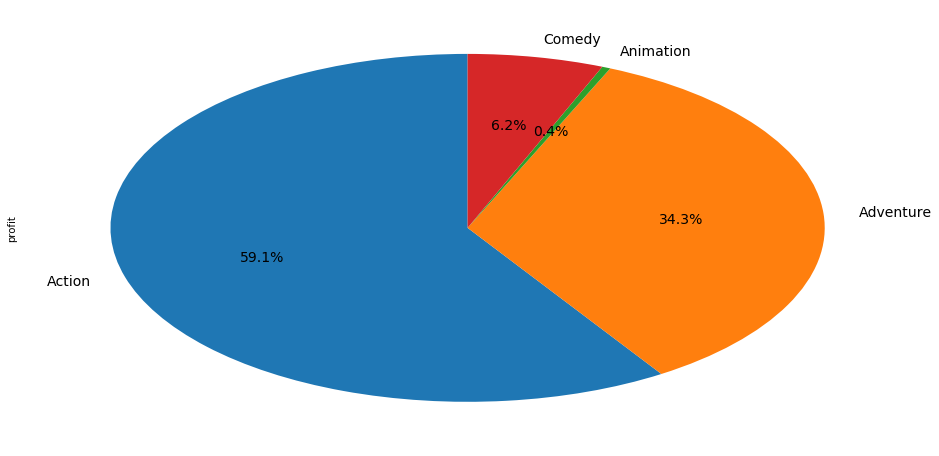

In [299]:
df_us_profit = df_us.groupby('genres', as_index=False)['profit'].mean()
df_us_profit.sort_values(by=['profit'], ascending=False)
df_us_profit = df_us_profit[df_us_profit['profit'] > 0]
df_us_profit.plot(kind='pie', y = 'profit', autopct='%1.1f%%',
 startangle=90, shadow=False, labels=df_21_profit['genres'], legend = False, fontsize=14,figsize=(16,8))

From this pie chart, we can conclude that Universal Studio made most of their profit by their Action movies, which accounts for almost 60% of its whole profit made in the last 30 years.

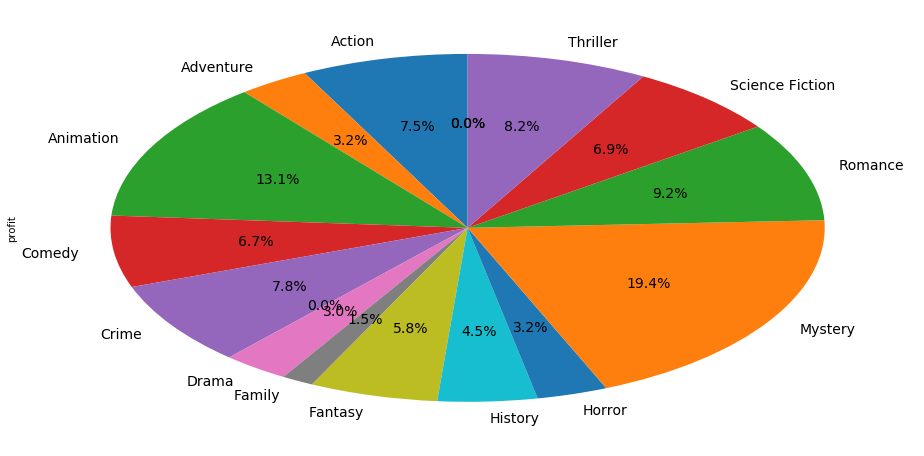

In [300]:
df_21_profit = df_21fox.groupby('genres', as_index=False)['profit'].mean()
df_21_profit.sort_values(by=['profit'], ascending=False)

df_21_profit.plot(kind='pie', y = 'profit', autopct='%1.1f%%',
 startangle=90, shadow=False, labels=df_21_profit['genres'], legend = False, fontsize=14,figsize=(16,8))

From this plot, we noticed that 20th Fox's Mystery movies are the most profitable. However, they can also benefit from films in other genres, such as Animation, Romance, Thriller etc. 

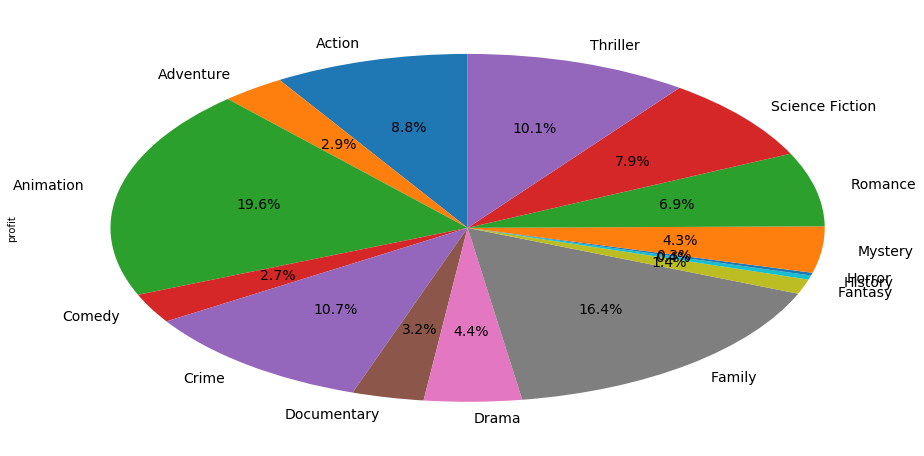

In [301]:
df_cp_profit = df_cp.groupby('genres', as_index=False)['profit'].mean()
df_cp_profit.sort_values(by=['profit'], ascending=False)
df_cp_profit = df_cp_profit[df_cp_profit['profit'] > 0]
df_cp_profit.plot(kind='pie', y = 'profit', autopct='%1.1f%%',
 startangle=90, shadow=False, labels=df_21_profit['genres'], legend = False, fontsize=14,figsize=(16,8))

From this plot, we know that Animation movies profit contributes most for Columbia Pictures. People are also willing to watch Crime, Family and Thriller films produced by them.

<a id='conclusions'></a>
## Conclusions
I made my analyzation based on the 'profit' of every films in the database. In the first problem, I tried to find some relationship between a movie's budget and its rating. But by visualization, I cannot get any correlations between them except that high cost movies tend to have a much better rating overall, and tend not to have a low rating compare to low cost film.

In the second problem, I figured out whether produce companies spend more money on Adventure, Action or Science Fiction movies. And the answer is quite clear, Adventure movies have much bigger budget than the other two.

In the last problem, I tried to find out the profit distribution among Columbia Pictures, Universal Studio and Twentieth Century Fox Film Corporation. 

## Limitations
In the first problem, I didn't define whether a film is a highly profitable film. Instead, I extract top 100 profitable film from the database and do the comparaison.

In terms of the second problem and the last problem, there are many movies that have multiple genres and produce companies. My way to solve this problem is to consider every movie which genre has Adventure, Action or Science Fiction. That will lead to overlap in statistics. And in last problem, I simply remain the first company in the column and delete rest of them.




